In [ ]:
import numpy as np
import string
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
data = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life.
For who would bear the whips and scorns of time,
Th'oppressor's wrong, the proud man's contumely,
The pangs of dispriz'd love, the law's delay,
The insolence of office, and the spurns
That patient merit of th'unworthy takes,
When he himself might his quietus make
"""

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(data)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 24))
axes[0].imshow(wordcloud)
axes[0].axis('off')
axes[1].imshow(wordcloud)
axes[1].axis('off')
axes[2].imshow(wordcloud)
axes[2].axis('off')
fig.tight_layout()

<h1 id="definition" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Definition
        <a class="anchor-link" href="#definition" target="_self">¶</a>
    </center>
</h1>

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.<br>
<br>
This is a behavior required in complex problem domains like machine translation, speech recognition, and more.<br>
<br>
LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

<h1 id="dataset" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Dataset
        <a class="anchor-link" href="#dataset" target="_self">¶</a>
    </center>
</h1>

### Creating the data

In [ ]:
data = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life.
For who would bear the whips and scorns of time,
Th'oppressor's wrong, the proud man's contumely,
The pangs of dispriz'd love, the law's delay,
The insolence of office, and the spurns
That patient merit of th'unworthy takes,
When he himself might his quietus make
"""

### Data preparation

In [ ]:
# remove \n
data = data.replace("\n", " ")

# lower cases
data = data.lower()

# remove punctuation
data = data.translate(str.maketrans('', '', string.punctuation))

# remove first and last character
data = data[1:-1]

print(data)

<h1 id="dictionaries" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Dictionaries
        <a class="anchor-link" href="#dictionaries" target="_self">¶</a>
    </center>
</h1>

In [ ]:
chars = sorted(set(data))

char_to_idx = {c:i for (i,c) in enumerate(chars)}
idx_to_char = {i:c for (i,c) in enumerate(chars)}

<h1 id="parameters" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Parameters
        <a class="anchor-link" href="#parameters" target="_self">¶</a>
    </center>
</h1>

In [ ]:
data_size, char_size = len(data), len(chars)

hidden_size = 10
weight_sd = 0.1
z_size = hidden_size + char_size
t_steps = 25

<h1 id="activation-functions" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Activation Functions
        <a class="anchor-link" href="#activation-functions" target="_self">¶</a>
    </center>
</h1>

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y * y

<h1 id="architecture" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Architecture
        <a class="anchor-link" href="#architecture" target="_self">¶</a>
    </center>
</h1>

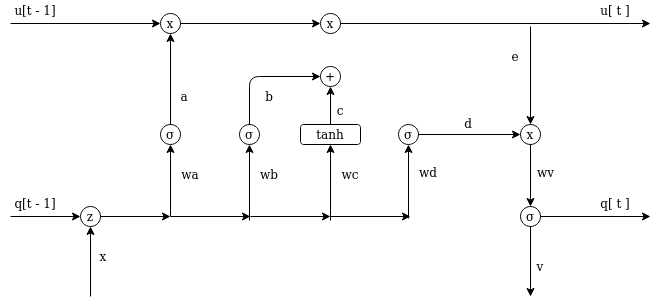

<h1 id="implementation" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Implementation
        <a class="anchor-link" href="#implementation" target="_self">¶</a>
    </center>
</h1>

In [ ]:
def forward(x, u, q):
    z = np.row_stack((q, x))

    a = sigmoid(np.dot(wa, z) + ba)
    b = sigmoid(np.dot(wb, z) + bb)
    c = tanh(np.dot(wc, z) + bc)
    d = sigmoid(np.dot(wd, z) + bd)

    e = a * u + b * c
    h = d * tanh(e)

    v = np.dot(wv, h) + bv
    y = np.exp(v) / np.sum(np.exp(v))

    return z, a, b, c, d, e, h, v, y

In [ ]:
def optimize(grads, theta, lr=0.05):
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = grads
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = theta
    
    wa -= dwa * lr
    wb -= dwb * lr
    wc -= dwc * lr
    wd -= dwd * lr
    wv -= dwv * lr
    
    ba -= dba * lr
    bb -= dbb * lr
    bc -= dbc * lr
    bd -= dbd * lr
    bv -= dbv * lr
    
    return wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

<h1 id="initialize" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Initialize variables
        <a class="anchor-link" href="#initialize" target="_self">¶</a>
    </center>
</h1>

In [ ]:
losses = {}
z, a, b, c, d, e, h, v, y = {}, {}, {}, {}, {}, {}, {}, {}, {}
q, x, u = {}, {}, {}

In [ ]:
wa, wb, wc, wd = [np.random.randn(hidden_size, z_size) * weight_sd + 0.5 for x in range(4)]
ba, bb, bc, bd = [np.zeros((hidden_size, 1)) for x in range(4)]

# output
wv = np.random.randn(char_size, hidden_size) * weight_sd
bv = np.zeros((char_size, 1))

In [ ]:
q[-1] = np.zeros((hidden_size, 1))
u[-1] = np.zeros((hidden_size, 1))

pointer = 25
t_steps = 25

inputs = ([char_to_idx[ch] for ch in data[pointer: pointer + t_steps]])
targets = ([char_to_idx[ch] for ch in data[pointer + 1: pointer + t_steps + 1]])

<h1 id="training" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Training
        <a class="anchor-link" href="#training" target="_self">¶</a>
    </center>
</h1>

In [ ]:
for epoch in range(1000):
    
    loss = 0
    
    # Forward propagation
    for t in range(len(inputs)):
        x[t] = np.zeros((char_size, 1))
        x[t][inputs[t]] = 1

        z[t], a[t], b[t], c[t], d[t], e[t], h[t], v[t], y[t] = forward(x[t], u[t - 1], q[t - 1])

        u[t], q[t] = e[t], h[t]

        loss += -np.log(y[t][targets[t], 0])


    dh_next = np.zeros_like(q[0])
    de_next = np.zeros_like(u[0])
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    # Backward propagation
    for t in reversed(range(len(inputs))):
        target = targets[t]

        dv = np.copy(y[t])
        dv[target] -= 1

        dwv += np.dot(dv, h[t].T)
        dbv += dv

        dh = np.dot(wv.T, dv)
        dh += dh_next

        dd = dh * tanh(e[t])
        dd = dsigmoid(d[t]) * dd

        dwd += np.dot(dd, z[t].T)
        dbd += dd

        de = np.copy(de_next)
        de += dh * d[t] * dtanh(tanh(e[t]))

        dc = de * b[t]
        dc = dtanh(c[t]) * dc

        dwc += np.dot(dc, z[t].T)
        dbc += dc

        db = de * dc
        db = dsigmoid(b[t]) * db

        dwb += np.dot(db, z[t].T)
        dbb += db

        da = de * u[t - 1]
        da = dsigmoid(a[t]) * da

        dwa += np.dot(da, z[t].T)
        dba += da

        dz = (np.dot(wa.T, da) 
              + np.dot(wb.T, db) 
              + np.dot(wc.T, dc) 
              + np.dot(dd.T, dd))

        dh_next = dz[:hidden_size, :]
        de_next = a[t] * de

    
    grads = dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv
    theta = wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

    # optimize with SGD the training data
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = optimize(grads, theta)
        
    losses[epoch] = loss

<h1 id="analyze" style="color:black; background:whte; border:0.5px dotted;"> 
    <center>Analyze
        <a class="anchor-link" href="#analyze" target="_self">¶</a>
    </center>
</h1>

In [ ]:
plt.plot(list(losses.keys()), [losses[x] for x in list(losses.keys())])

If you liked this implementation, don't forget to up-vote :)

P.S: The architecture of LSTM is drawn by me, a little Picasso.